<a href="https://colab.research.google.com/github/iamujjwal98/ml_projects/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.2.0


In [0]:
fashion_data=keras.datasets.fashion_mnist
(train_images,train_label),(test_images,test_labels)=fashion_data.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [72]:
#train_images[0]
len(train_label)

60000

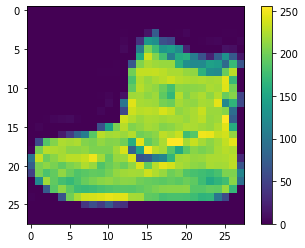

In [73]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()
plt.show()


In [0]:
train_images=train_images/255.0
test_images=test_images/255.0


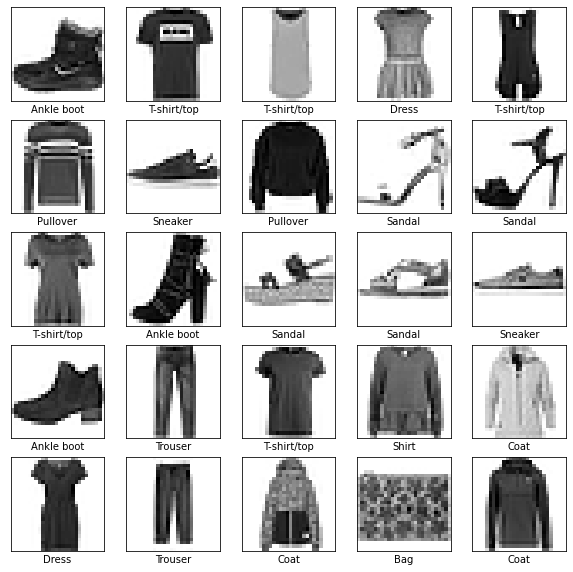

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  #plt.colorbar
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.fit(train_images, train_label, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2317 - accuracy: 0.9130
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2219 - accuracy: 0.9175
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2162 - accuracy: 0.9191
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2106 - accuracy: 0.9211
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2042 - accuracy: 0.9244
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1996 - accuracy: 0.9242
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9267
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1900 - accuracy: 0.9281
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1832 - accuracy: 0.9308
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.179

In [80]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("the accuracy is ",test_acc)

313/313 - 0s - loss: 0.3779 - accuracy: 0.8850
the accuracy is  0.8849999904632568


In [0]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [0]:
probability=probability_model.predict(test_images)

In [87]:
probability[0]

array([3.7423318e-09, 1.8392956e-11, 2.0231992e-10, 4.7190182e-20,
       1.2387200e-08, 3.9401730e-05, 1.0583472e-09, 3.5928548e-04,
       7.1309858e-10, 9.9960130e-01], dtype=float32)

In [88]:
print(np.argmax(probability[0]))

9


In [89]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

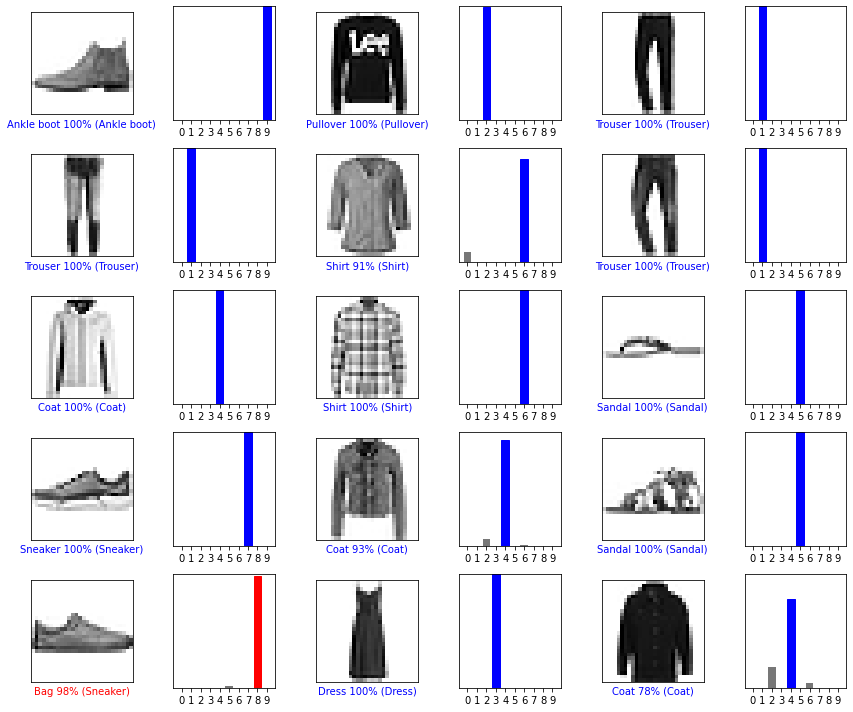

In [93]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, probability[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, probability[i], test_labels)
plt.tight_layout()
plt.show()